# 
<h1 style="text-align:center;color:#707B7C;">Students Adaptability Level in Online Education</h1>




<h1 style="text-align:center;color:#1A5276;">Effectiveness of online education</h1>

<h5 style="text-align:left;color:#1A5276;">Dataset</h5>

**Introduction**

Machine learning is a great opportunity to test some techniques to predict the outcome of predicting the adaptability level of students in online education using machine learning approaches.
(Machine learning is a great opportunity to try some techniques to predict the outcome of Students’ Adaptability Level Prediction in Online Education using Machine Learning Approaches.)


<h5 style="text-align:left;color:#1A5276;">Fuente</h5>



(The original research paper. Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches or DOI: 10.1109/ICCCNT51525.2021.9579741)

https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

<h5 style="text-align:left;color:#1A5276;">Inspiratiion</h5>

To get an idea about the effectiveness of online education and how could be improve it

<h5 style="text-align:left;color:#1A5276;">Variables</h5>

The target feature is:
Adaptivity level

The feature sets are:
Gender |
Age|
Education Level|
Institution Type|
IT Student|
Location in Town|
Load-shedding|
Financial Condition|
Internet Type|
Network Type|



<h5 style="text-align:left;color:#1A5276;">Librarys</h5>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, plot_confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from IPython.display import Image



<h1 style="text-align:center;color:#1A5276;"> Preparation of data</h1>

Let's read the file on students_adaptability_level_online_education.csv

In [70]:
data_raw = pd.read_csv('students_adaptability_level_online_education.csv')
print('Total de rows: ',data_raw.shape[0],'Total de columns: ',data_raw.shape[1])

Total de rows:  1205 Total de columns:  14


<h5 style="text-align:left;color:#1A5276;">DATA EXPLORATORY</h5>

Rename of columns

In [71]:
data_raw.rename(columns={"Gender":"gender","Age":"age","Education Level":"education_level",
"Institution Type":"institution_type","IT Student":"IT_student","Location":"location",
"Load-shedding":"electricity_supply","Financial Condition":"financial_condition",
"Internet Type":"internet_type","Network Type":"network_type","Class Duration":"class_duration",
"Self Lms":"learning_system","Device":"device","Adaptivity Level":"adaptivity_level",
} ,inplace=True)

In [72]:
data_raw.head()

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


<h5 style="text-align:left;color:#1A5276;">DATA CLEASING</h5>

In [73]:
def percent_nulls(data):
 nulos=pd.DataFrame(data.isnull().sum())
 nulos['porcentaje_nulos'] =round(nulos/data.shape[0]*100,2)
 print (nulos[1:])

In [74]:
percent_nulls(data_raw)

                     0  porcentaje_nulos
age                  0               0.0
education_level      0               0.0
institution_type     0               0.0
IT_student           0               0.0
location             0               0.0
electricity_supply   0               0.0
financial_condition  0               0.0
internet_type        0               0.0
network_type         0               0.0
class_duration       0               0.0
learning_system      0               0.0
device               0               0.0
adaptivity_level     0               0.0


Well, our dataset doesn't contain null values

In [75]:
target =pd.DataFrame(data_raw['adaptivity_level'].value_counts())
target['percentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,adaptivity_level,percentaje
Moderate,625,51.87
Low,480,39.83
High,100,8.30


Let's examine the distribution of data in the target variable

Text(0.5, 1.0, 'adaptivity_level')

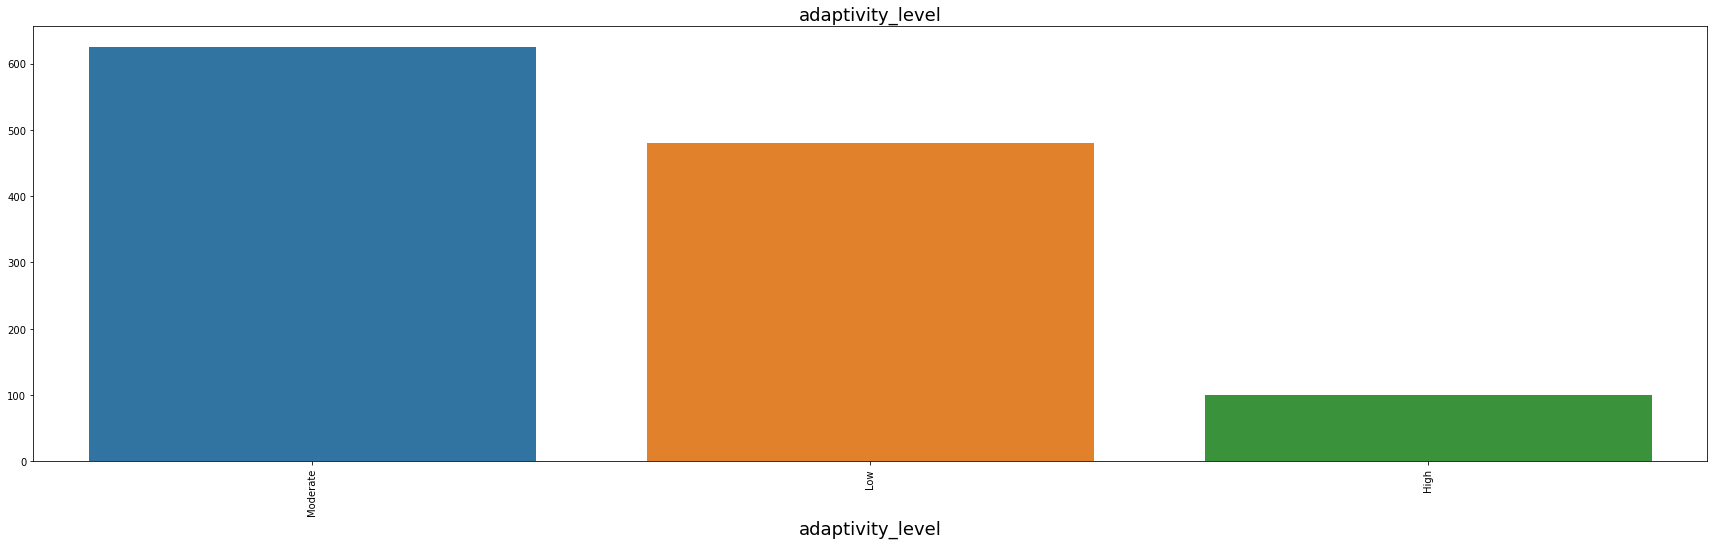

In [76]:
#A graphical representation
plt.figure(figsize=(30,8))
sns.countplot(x='adaptivity_level',data=data_raw)
plt.xticks(rotation=90)
plt.xlabel("adaptivity_level", fontsize=18)
plt.ylabel("", fontsize=18)
plt.title("adaptivity_level", fontsize=18)

Full categories

In [77]:
for column in data_raw.columns:
   #data_raw[column].unique
 print (data_raw[column].unique())

['Boy' 'Girl']
['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
['University' 'College' 'School']
['Non Government' 'Government']
['No' 'Yes']
['Yes' 'No']
['Low' 'High']
['Mid' 'Poor' 'Rich']
['Wifi' 'Mobile Data']
['4G' '3G' '2G']
['3-6' '1-3' '0']
['No' 'Yes']
['Tab' 'Mobile' 'Computer']
['Moderate' 'Low' 'High']



Observation in the distribution of the categories

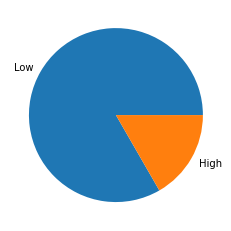

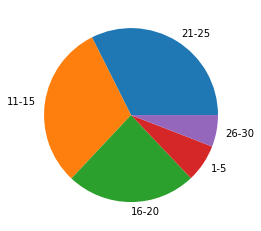

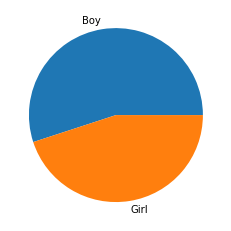

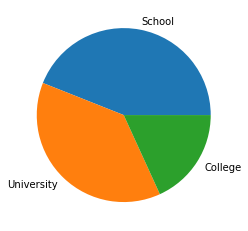

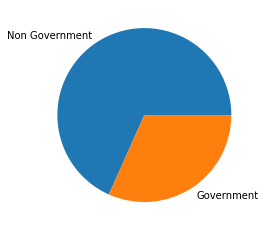

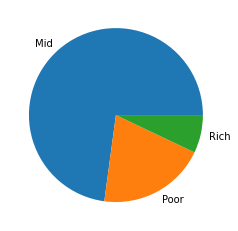

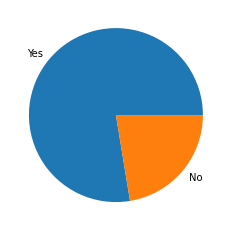

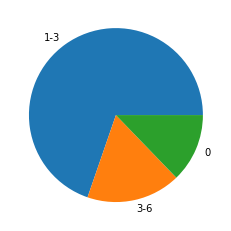

In [78]:
def grafics(col):
    for cat in columns:
        titulocat=f' Pie Chart : {cat}'
        titulo=HTML('<h1 style="text-align:left;color:#1A5276;">'+ titulocat +'</h1>')
        display(titulo)
        y=data_raw[cat].value_counts() 
        valores = y[:5].values.tolist()
        labels=y[:5].index.tolist()
        plt.pie(valores,labels=labels)
        fig=plt.show()
    
    
columns=['electricity_supply','age','gender','education_level','institution_type','financial_condition','location','class_duration',]   
grafics(columns)

Abstract of features

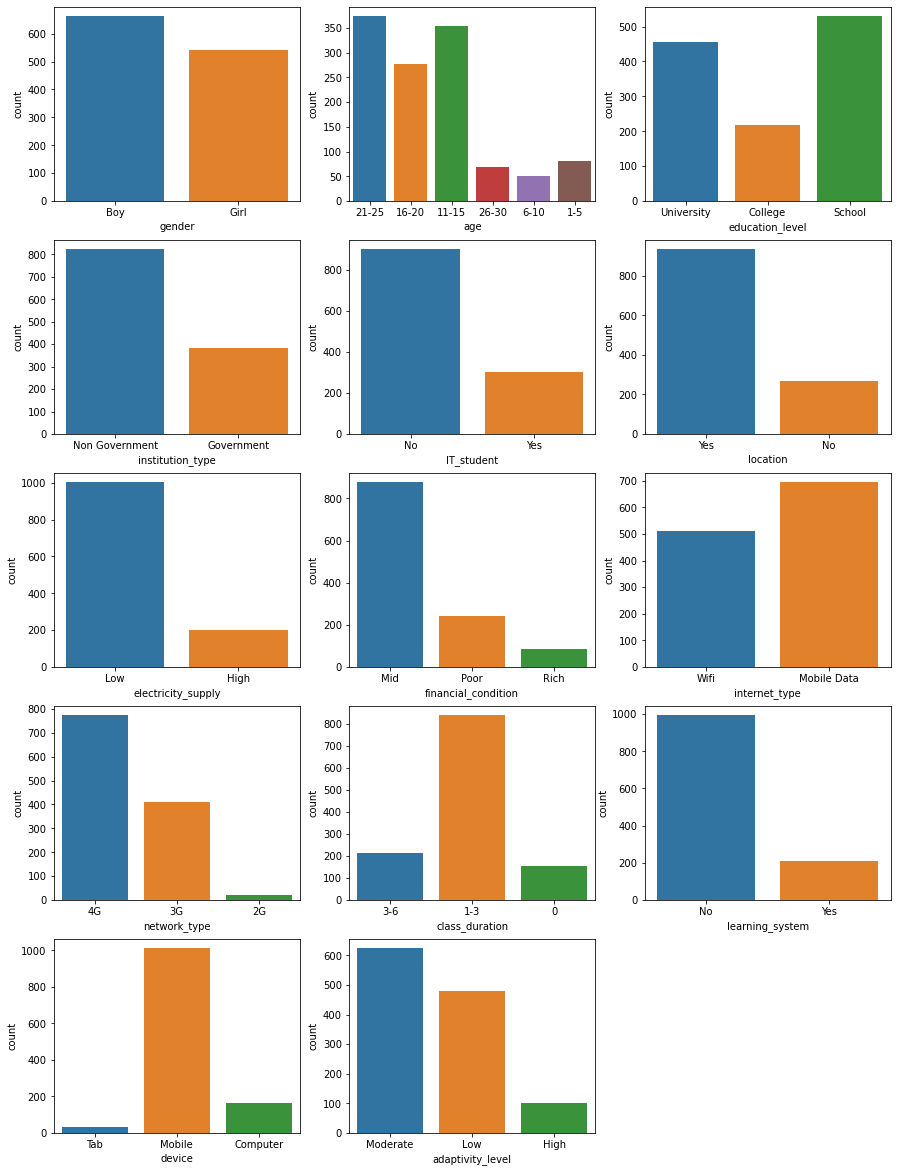

In [79]:
i = 1
plt.figure(figsize = (15,25))
for feature in data_raw:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data_raw)
    i +=1

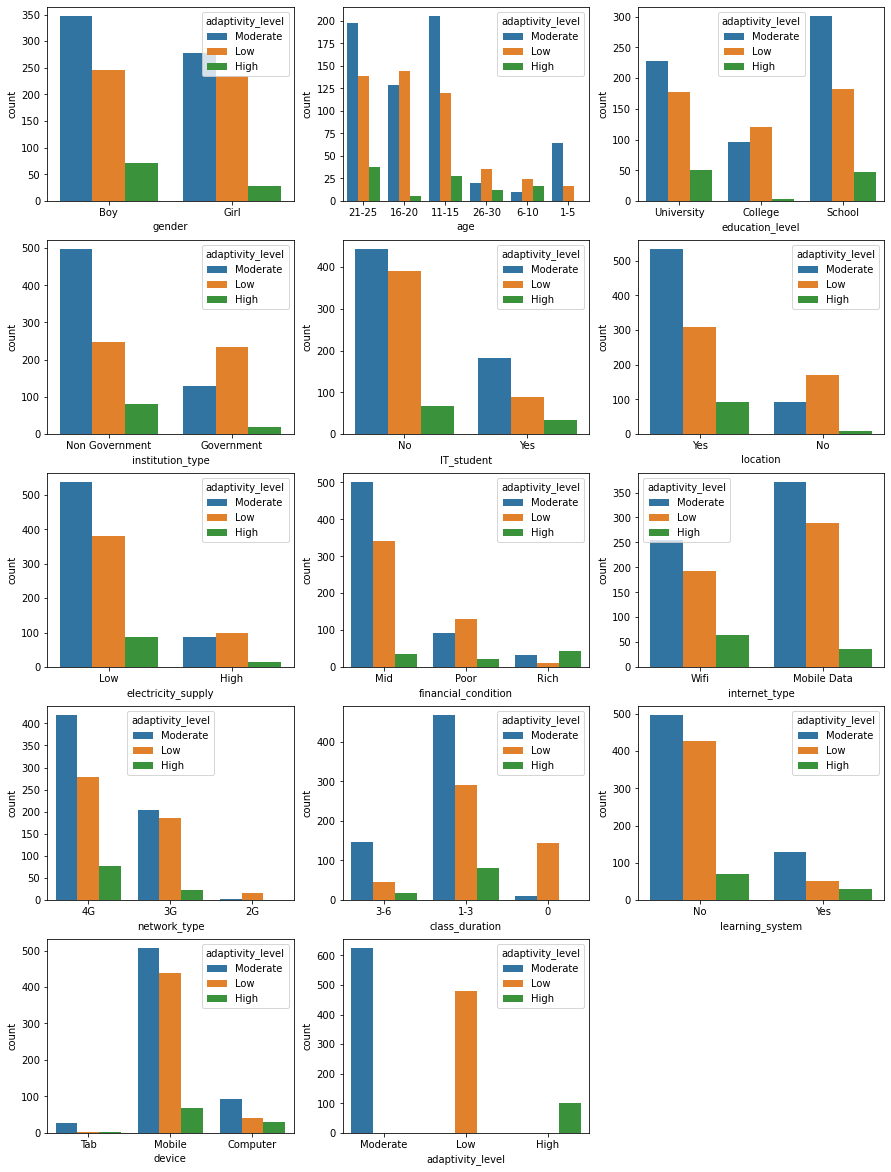

In [80]:
i = 1
plt.figure(figsize = (15,25))
for feature in data_raw:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue = 'adaptivity_level', data = data_raw)
    i +=1

**Data Analysis**

Gender: Male students shows a bit of higher adaptability than Females


 Self SLM Platforms: Institution that have one shows mayor adaptability

Also Location, IT_student, Institution type, finantial condition, class duration, Self SLM Plataform, device impact, are variables that show an impact on adaptability level to e-learning education

Data is converted to dummies

In [81]:
columns=['gender', 'age', 'education_level', 'institution_type',
       'IT_student', 'location', 'electricity_supply', 'financial_condition',
       'internet_type', 'network_type', 'class_duration', 'learning_system',
       'device','adaptivity_level']#menos , 'adaptivity_level'
#columns=data_raw.columns
data=pd.get_dummies(data_raw, columns=columns,drop_first=True)
data.head(10)

,gender_Girl,age_11-15,age_16-20,age_21-25,age_26-30,age_6-10,education_level_School,education_level_University,institution_type_Non Government,IT_student_Yes,...,internet_type_Wifi,network_type_3G,network_type_4G,class_duration_1-3,class_duration_3-6,learning_system_Yes,device_Mobile,device_Tab,adaptivity_level_Low,adaptivity_level_Moderate
0,0,0,0,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,1,0,1
1,1,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,1,1,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,1,0,0,1
4,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
6,0,1,0,0,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
7,0,1,0,0,0,0,1,0,1,0,...,1,0,1,1,0,0,1,0,0,1
8,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,1,0
9,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1


**Porcentajes de valores de la variable TARGET**

In [82]:
target =pd.DataFrame(data_raw['adaptivity_level'].value_counts())
target['porcentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,adaptivity_level,porcentaje
Moderate,625,51.87
Low,480,39.83
High,100,8.30


<h4><span style="color:#1A5276"> Ho </span> = 92 / 5.000
Resultados de traducción
The probability that a student falls into the Moderate adaptability category is <span style="color:#1A5276"> = 0,5186 </span></h4>
<h4><span style="color:#1A5276"> H1 </span>= 92 / 5.000
Resultados de traducción
The probability that a student falls into the Moderate adaptability category is  <span style="color:#1A5276"> > 0,5186 </span></h4>

Let's define the  TARGET y FEATURES

In [83]:
X=data.drop(['adaptivity_level_Moderate'],axis=1)#Features 
y=data['adaptivity_level_Moderate'] #target

In [84]:
#Partition the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(903, 23) (903,) (302, 23) (302,)


In [85]:
# Make sure the proportions are correct 
y_train.mean(), y_test.mean()

(0.5182724252491694, 0.5198675496688742)

In [86]:
data.head(3)

,gender_Girl,age_11-15,age_16-20,age_21-25,age_26-30,age_6-10,education_level_School,education_level_University,institution_type_Non Government,IT_student_Yes,...,internet_type_Wifi,network_type_3G,network_type_4G,class_duration_1-3,class_duration_3-6,learning_system_Yes,device_Mobile,device_Tab,adaptivity_level_Low,adaptivity_level_Moderate
0,0,0,0,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,1,0,1
1,1,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1


In [87]:
max_abs_scaler = preprocessing.MaxAbsScaler()

<h1 style="text-align:center;color:#1A5276;"> Implementación de Pipeline </h1>

<h5 style="text-align:left;color:#1A5276;">PIPELINE implementation</h5> 

Build the list of steps that are executed in sequence. We will instantiate different models with different scaling mode

<h5 style="text-align:left;color:#1A5276;">Logistic Regression</h5> 

In [88]:
pipeline_lr=Pipeline([('scalar_1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

                     

<h5 style="text-align:left;color:#1A5276;">Logistic Regression sin PCA</h5> 

In [89]:
lr_SinPCA=Pipeline([('scalar_2',preprocessing.MaxAbsScaler()),
                     #('pca5',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

<h5 style="text-align:left;color:#1A5276;">DecisionTreeClassifier</h5> 

In [90]:
pipeline_dt=Pipeline([('scalar_3',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

<h5 style="text-align:left;color:#1A5276;">RandomForestClassifier</h5>

In [91]:
pipeline_randomforest=Pipeline([('scalar_4',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

<h5 style="text-align:left;color:#1A5276;">Random Forest con MaxAbsScaler</h5>

In [92]:
pipeline_randomforest_2=Pipeline([('scalar_5',preprocessing.MaxAbsScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('rf2_classifier',RandomForestClassifier())])

<h5 style="text-align:left;color:#1A5276;">Random Forest con MaxAbsScaleer sin PCA</h5>

In [93]:
pipeline_randomforest_3=Pipeline([('scalar_6',preprocessing.MaxAbsScaler()),
                     #('pca4',PCA(n_components=2)),
                     ('rf2_classifier_1',RandomForestClassifier())])

<h5 style="text-align:left;color:#1A5276;">KNN KNeihborsClassifier</h5>

In [94]:
pipeline_knn=Pipeline([('scalar_7',preprocessing.MaxAbsScaler()),
                     #('pca5',PCA(n_components=2)),
                     ('knn_classifier',knn(n_neighbors=6))])


<h5 style="text-align:left;color:#1A5276;">AdaBoostClassifier</h5>

In [95]:
pipeline_ada=Pipeline([('scalar_8',preprocessing.MaxAbsScaler()),
                     #('pca5',PCA(n_components=2)),
                     ('ada_classifier',AdaBoostClassifier(n_estimators=50,learning_rate=1))])


                  

<h5 style="text-align:left;color:#1A5276;">GaussianNB</h5>

In [96]:
pipeline_GB=Pipeline([('scalar_9',preprocessing.MaxAbsScaler()),
                     #('pca5',PCA(n_components=2)),
                     ('GB_classifier',GaussianNB())])

             

<h5 style="text-align:left;color:#1A5276;">DecisionTreeRegressor</h5>

In [97]:
pipeline_dtr=Pipeline([('scalar_10',preprocessing.MaxAbsScaler()),
                     #('pca5',PCA(n_components=2)),
                     ('DTR_classifier',DecisionTreeRegressor())])

<h5 style="text-align:left;color:#1A5276;">Instantiate `pipeline` with previously defined steps</h5>

In [98]:
pipelines = [pipeline_lr,lr_SinPCA, pipeline_dt, pipeline_randomforest,pipeline_randomforest_3,pipeline_randomforest_2,pipeline_knn,pipeline_ada,pipeline_GB,pipeline_dtr]

<h1 style="text-align:center;color:#1A5276;">Initialize the models</h1>

In [99]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

<h5 style="text-align:left;color:#1A5276;">

We train the `pipeline` instance with the training data, using the `fit` method</h5>


In [100]:
pipe_dict = {0: 'Logistic Regression', 1: 'Logistic Regression 	sin PCA',2: 'Decision Tree', 3: 'RandomForest_StandScaler', 4:'RandomForest_MaxScaler',5: 'RandomForest_SinPCA' ,6:'KNN', 7:'Ada', 8:'GB',9:'pipeline_dtr'}

# Fit the pipelines
for pipe in pipelines:
	print(pipe[1]) ##Para ver cada uno de los clasificadores
	pipe.fit(X_train, y_train)
	

PCA(n_components=2)
LogisticRegression(random_state=0)
PCA(n_components=2)
PCA(n_components=2)
RandomForestClassifier()
PCA(n_components=2)
KNeighborsClassifier(n_neighbors=6)
AdaBoostClassifier(learning_rate=1)
GaussianNB()
DecisionTreeRegressor()


<h5 style="text-align:left;color:#1A5276;">The `score` method returns *accuracy* of the model.</h5>
      

In [101]:
for i,model in enumerate(pipelines):   
   presicion=HTML('<h4  style="text-align:left;color:#707B7C;">'+"{} Test Accuracy:<span style='color:#1A5276'>  {} </span>".format(pipe_dict[i],model.score(X_test,y_test))  + '</h4>')
   display(presicion)  
 

In [102]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
        
clasificacion=HTML('<h1 style="text-align:left;color:#707B7C;">'+'Classification with the best ACCURACY :<span style="color:#1A5276"> {}</span>'.format(pipe_dict[best_classifier]) +'</h1>')
display(clasificacion)


<h1 style="text-align:center;color:#707B7C;"> Pipelines Perform Hyperparameter Usando GridSearchCV</h1>

**The hyperparameter grid identifies the pipeline step and the hyperparameter and the values to evaluate..**
**Indicated with the syntax: nombre_paso__nombre_hiperparámetro.**


Combine both methods by instantiating `GridSearchCV` with *
  - <text style="text-align:left;color:#1A5276;"> `pipeline`</text>
  - <text style="text-align:left;color:#1A5276;"> grid.</text>
  - <text style="text-align:left;color:#1A5276;">  cross validation.</text>
  
**After that we will train the model**

<h1 style="text-align:center;color:#707B7C;">Creating Pipeline</h1>
<h1 style="text-align:center;color:#1A5276;">Creation and use of algorithms and  hiperparameters</h1>

In [103]:
pipe = Pipeline([("classifier", RandomForestClassifier())])
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                 
                 {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}
                 ]
# To get the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)



<h1 style="text-align:center;color:#1A5276;">To get the best estimator</h1>

In [104]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('classifier', LogisticRegression(C=7.742636826811269))])
The mean accuracy of the model is: 0.9437086092715232


<h3 style="text-align:left;color:#1A5276;">The parameters of the estimators can be seen with the `get_params` method.</h3>

In [105]:
pipe.get_params()

{'memory': None,
 'steps': [('classifier', RandomForestClassifier())],
 'verbose': False,
 'classifier': RandomForestClassifier(),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_impurity_split': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}


---
Let's see the  **score** of the best model (`best_score_`), and the (`best_estimator_`).

In [106]:
print('Score: ',gridsearch.best_score_)
gridsearch.best_estimator_

Score:  0.9435359116022101


Pipeline(steps=[('classifier', LogisticRegression(C=7.742636826811269))])

Evaluating the performance with the test values

In [107]:
accuracy_score(gridsearch.best_estimator_.predict(X_test),y_test)

0.9437086092715232

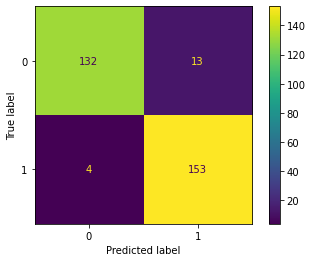

In [108]:

plot_confusion_matrix(gridsearch,X_test,y_test)

In [109]:
print(classification_report( y_test,gridsearch.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       145
           1       0.92      0.97      0.95       157

    accuracy                           0.94       302
   macro avg       0.95      0.94      0.94       302
weighted avg       0.95      0.94      0.94       302



<h3 style="text-align:left;color:#707B7C;">Since the accuracy: <span style="color:#1A5276"> 0.94 </span>  is greater than the null hypothesis, we reject the null hypothesis in favor of the alternative</h3>
 

<h3 style="text-align:left;color:#1A5276;">BONUS - MULTINOMIAL LOGISTIC REGRESSION</h3>

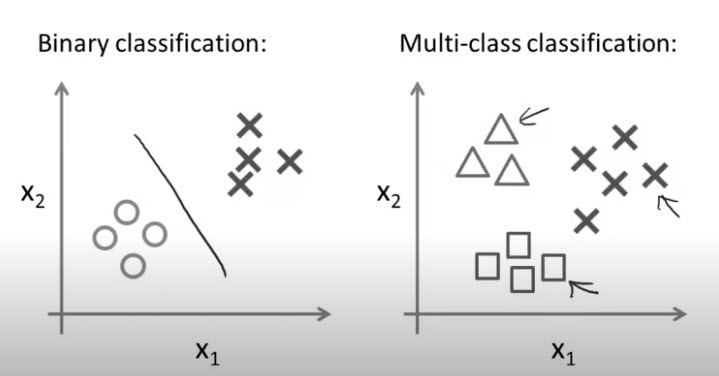

In [126]:

Image(filename='image.jpg')

<h3 style="text-align:left;color:#1A5276;"> data to dummies - Except the target</h3>

In [111]:

data_dumies=pd.get_dummies(data_raw,columns=['gender','age', 'education_level', 'institution_type',
       'electricity_supply', 'financial_condition', 'internet_type',
       'network_type', 'class_duration', 'learning_system', 'device','IT_student','location'],drop_first=True)

In [112]:
X=data_dumies.drop(['adaptivity_level'],axis=1)#Features 
y=data_dumies['adaptivity_level'] #target

<h3 style="text-align:left;color:#1A5276;">Partition the data into train and test</h3>

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(903, 22) (903,) (302, 22) (302,)


In [114]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))



In [115]:
scaler = StandardScaler()
X_train = max_abs_scaler.fit_transform(X_train)
X_test = max_abs_scaler.transform(X_test)

In [116]:
y_train.value_counts()

Moderate    468
Low         360
High         75
Name: adaptivity_level, dtype: int64

<h3 style="text-align:left;color:#1A5276;">Definition of Multinomial Model</h3>

In [117]:
softmax_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=250)
#Training model
softmax_model.fit(X_train,y_train)
#Forecast data
y_pred = softmax_model.predict(X_test)
accuracy_1=accuracy_score(y_test,y_pred)
print(accuracy_1)

0.6887417218543046


c:\Users\Jannet\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


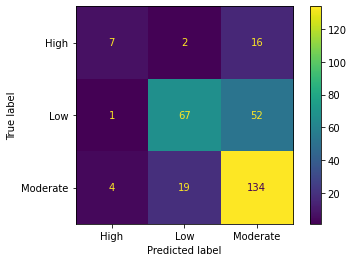

In [118]:

plot_confusion_matrix(softmax_model,X_test,y_test)

In [119]:

print(classification_report( y_test,y_pred))

              precision    recall  f1-score   support

        High       0.58      0.28      0.38        25
         Low       0.76      0.56      0.64       120
    Moderate       0.66      0.85      0.75       157

    accuracy                           0.69       302
   macro avg       0.67      0.56      0.59       302
weighted avg       0.70      0.69      0.68       302



Since the accuracy:  is greater than the null hypothesis, we reject the null hypothesis in favor of the alternative

 <h3 style="text-align:left;color:#1A5276;"> Using SMOTE 

 </h3>

In [120]:

sm = SMOTE(random_state = 2 )
X_train, y_train = sm.fit_resample(X_train, y_train) 

In [121]:
y_train.value_counts() #Balanceo de datos

Moderate    468
High        468
Low         468
Name: adaptivity_level, dtype: int64

In [122]:

softmax_model.fit(X_train,y_train)
#Forecast data
y_pred_smote = softmax_model.predict(X_test)
accuracy_2 = accuracy_score(y_test,y_pred_smote)

print(accuracy_2)

0.7019867549668874


c:\Users\Jannet\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**with the use of Smote results of accuracy wasn't substantially higher**

Finally, it is trained without the stratify parameter, a decrease in accuracy is expected.

The stratification parameter will ensure that the train and test split have the same class distribution index as the original dataset. It is crucial in the case of unbalanced data sets. Otherwise, it could happen that the training data only consists of the majority class.

In [123]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)#sin stratify
#scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

softmax_model.fit(X_train,y_train)
#Forecast data
y_pred_sinST = softmax_model.predict(X_test)
accuracy_score(y_test,y_pred_sinST)
accuracy_3 = accuracy_score(y_test,y_pred_smote)

print(accuracy_3)

0.44039735099337746


c:\Users\Jannet\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
H0=0.518672

<h1 style="text-align:center;color:#707B7C;">Summary </h1>

In [125]:
modelo_performance_accuracy = pd.DataFrame({'Model': ['H0',
                                                      'Multinomial_básico',
                                                      'Multinomial_smote',  
                                                      'Multinomial_sin_stratify'],
                                            'Accuracy': [H0,
                                                         accuracy_1,
                                                         accuracy_2,
                                                         accuracy_3,
                                                        ]})
modelo_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
2,Multinomial_smote,0.701987
1,Multinomial_básico,0.688742
0,H0,0.518672
3,Multinomial_sin_stratify,0.440397


<h1 style="text-align:center;color:#707B7C;">Conclussion </h1>

<h5 style="text-align:left;color:white;">
Statistical conclusion:<span style="color:#707B7C">Reject H0 with multinomial model.</span>

- It is proven that the stratify parameter during the division of X_train and X_test contributes to a better performance of the model since the categories were found to be unbalanced, and its use is fundamental.

-  A maximum accuracy of <span style="color:#707B7C">0.95</span> was obtained by passing the target variable to dummies and taking as X: adaptvity_level_Moderate, for the models that required numerical variables.

-  An accuracy of <span style="color:#707B7C">0.7</span> was obtained with the multinomial model, preserving the target with its three categories. In the latter, the smote method was evaluated without improving the performance of the model. </h5>

**Thanks**